In [1]:
import pandas as pd

In [11]:
import sys
sys.path.append("..")  # Adds the parent directory to the Python path
import ST_calc as ST
from ST_calc import plot_calc

In [3]:
NIMH = 'https://s3.amazonaws.com/openneuro.org/ds004215/phenotype/demographics.tsv?versionId=ZrtBS977QEYq4f0_sP.3.gorcpzILsMC'
NIMH = pd.read_csv(NIMH, sep='\t')
NIMH.to_csv('data_ds004215/nimh_dataset_ds004215.csv', sep=',', index=False)


na_percentage = ((NIMH == -999) | (NIMH == -777)).mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

REFERRAL_TYPE_SECONDARY_5    100.000000
REFERRAL_TYPE_SECONDARY_4     99.946723
RACE_1_4                      99.893447
CURRENT_GENDER_2              99.840170
REFERRAL_TYPE_SECONDARY_3     99.840170
RACE_1_3                      99.733617
LGBT_IDENTITY_2               99.680341
RACE_1_2                      99.200852
PARTICIPATE_STUDY_4           98.987746
REFERRAL_TYPE_SECONDARY_2     98.188599
REFERRAL_TYPE_SECONDARY       75.013319
PARTICIPATE_STUDY_3           70.964305
PARTICIPATE_STUDY_2           39.904102
PARTICIPATE_NIH_STUDY         23.867874
WORK_NIH_CAMPUS               23.708045
dtype: float64

In [4]:
columns_to_drop = na_percentage[na_percentage > 75].index
NIMH = NIMH.drop(columns=columns_to_drop)
NIMH.to_csv('data_ds004215/nimh_dataset_ds004215.csv', sep=',', index=False)

In [9]:
suda = pd.read_csv('data_ds004215/suda_ds004215.csv', sep=',')
pif = pd.read_csv('data_ds004215/pif_ds004215.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds004215/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds004215/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds004215/k-combined-3-13.csv', sep=',')


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.83
Kendall's Tau between suda & pif: 0.65, p-value: 0.0000


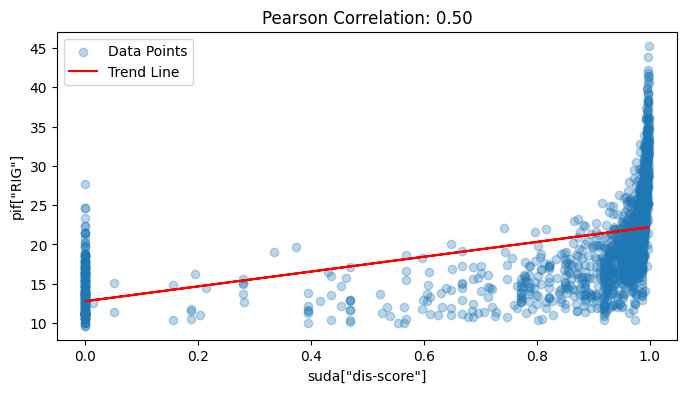

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.82
Pearson Correlation between K-combined & PIF field level: 0.39
Pearson Correlation between SUDA & K-combined field level: 0.09


Spearman Rank Correlation between PIF & SUDA: 0.84
Spearman Rank Correlation between PIF & K: 0.43
Spearman Rank Correlation between SUDA & K: 0.31


In [12]:
ST.stats(suda, pif, suda_field_score, k_combined_field)